<a href="https://colab.research.google.com/github/pedroAndrad1/deep_learning/blob/master/intro_deep_learning_fashion_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explorando o Dataset

        Aqui vamos estudar deep learning que é uma ramificação do machine learning. No machine learning, para classificar itens, tínhamos um dataset com as varíaveis dos itens. Por exemplo, numa situação em que desejamos classificar animais entre porco e cachorro, teriámos uma dataset que diria se o animal late, tem pata curta, comprimento dos pelos etc. Mas imagine fazer isso para classificar imagens de roupas. Existem centenas de características para uma roupa. Isso dificulta muito o processo.

        No deep learning, ao invés de utilizarmos essas características previamente ditas, utilizamos funções matemáticas para extrair essas características da imagem. Aqui usaremos um dataset muito famoso, o fashion_mnist. Muito recomendado para deep learning. Neste daset há setenta mil imagens de roupas de uma loja alemã chamada zalango. Todas as imagens estão em um formato de 28 x 28 pixels.

        Utilizaremos a biblioteca Keras para a nossa modelagem e aprendizado. Esta biblioteca roda em cima de outra biblioteca chamada TensorFlow. Para facilitar o trabalho, usaremos o Keras que é mais alto nível que o TensorFlow. Mas lembre-se, quanto mais alto nível, menos controle temos sobre o que está acotecendo por de baixo dos panos.

Docs:

https://www.tensorflow.org

https://keras.io

In [0]:
from tensorflow import keras

#O dataset que sera usado ja esta dentro do keras.
#O que faz sentido, visto que ele e tao famoso e usado.

#Aqui ainda nao carregamos o dataset, so damos o endereco dele.

fashion_mnist = keras.datasets.fashion_mnist

#Para carregar o dataset, usaremos a funcao load_data() do objeto que recebemos acima.
#Esta funcao nos retorna uma 2-tupla cada elemento dessa tupla tambem sao 2-tupla.
#Esses elementos ja sao o nosso dataset splitado em treino e teste. 
#E retornado o seguinte: ( (x_treino, y_treino) , (x_teste, y_teste) ).
#Por default, e splitado, nesse caso, 60000 para treino e 10000 para teste.
#Nao sei como funciona para outros datasets, so lendo a documentacao.

#Obs: Tentei receber o retorn da funcao usando
#x_treino, y_treino, x_teste, y_teste, como no retorno do train_test_split.
#Nao deu certo, tem que usar tuplas mesmo.
#Mas depois da pra chamar cada variavel individualmente.

(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()

Com o dataset em mão, vamos dar uma olhada em seu conteúdo. Vamos ver o que tem no x_treino.

In [0]:
x_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Vemos que é um array de varíos, mas precisamente 60000, arrays de 28 por 28. Estes arrays representam as nossas imagens. Cada array tem 28 por 28 porque cada imagem é de 28 x 28 pixels.

In [0]:
x_treino.shape

#Vendo o atributo shape, vemos essas informacoes.
#O primeiro elemento diz que o length do array e de 60000.
#A segunda e terceria informacoes dizem que cada elemento de 28x28.

(60000, 28, 28)

Mas so temos numeros que representam uma imagem. Vamos usar entao o modulo plyplot da biblioteca matplotlib para plotar essas informacoes como uma imagem.

docs:

https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

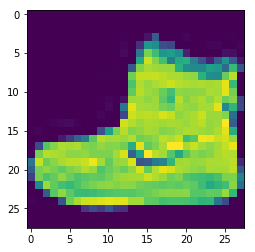

In [0]:
import matplotlib.pyplot as plt

#Passaremos um elemento do x_treino para a funcao imshow do plt
#para esta plotar uma imagem.

plt.imshow(x_treino[0])

Vamos agora explorar nossas classes.

In [0]:
y_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Opa, esperávamos que nossas classes fossem nomes como camise, tênis etc. Acontece que o dataset usa números para identificar as classes e tem uma legenda na documentação:

https://github.com/zalandoresearch/fashion-mnist

Esta é a legenda:

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

Vamos então criar um array com as os nomes das classes.


In [0]:
y_nomes = ["T-shirt/top", "Trouser", "Pullover", " Dress", "Coat", "Sandal", "Shirt", "Sneaker", " Bag", "Ankle boot" ]

Feito isso, vamos imprimir um conjunto de imagens usando a função subplot() do plt. 
Esta função recebe como parametrô o número de linhas, de colunas e o último é um idenx para posicionar cada imagem.Também vou usar a função title para dar um título a cada imagem.

docs:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html

Vou usar um for para iterar pelo x_treino e y_treino e plotar os elementos.

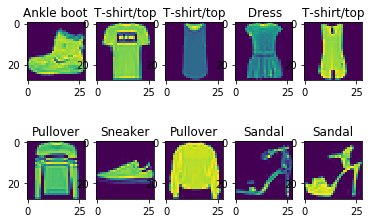

In [0]:
for imagens in range(10):
  #Serao duas linhas e 5 colunas
  plt.subplot(2,5, imagens+1)
  #Plotando a imagem
  plt.imshow(x_treino[imagens])
  #Dando um titulo para a imagem.
  #O titulo sera a String na posicao da classe no array y_nomes.
  plt.title(y_nomes[ y_treino[imagens] ])

#Costruindo o modelo

Antes, machine learning, tínhamos 3 elementos: A entrada, o processamento e a saída. A entrada eram as nossas features, o processamento era o modelo e a sáida eram os predict's que o modelo dava. 

Aqui, nosso modelo incorporá estes três elementos. Estas serão as camadas do modelo. Usaremos um modelo sequencial do Keras, keras.Sequential.

docs:

https://keras.io/getting-started/sequential-model-guide/

#Camada 0

Nesta camada estão os primeiros neurônios que terão contato com o input, aqui vamos dizer qual é o shape (formato) das entradas com as quais o modelo vai trabalhar. 

Camada em inglês é layer, e o Keras possui várias camadas, então escreveremos layers.

Para transformarmos a nossa imagem de 28 x 28px em um array de 1 dimensão, com todos esses 28, 28 pixels, que serão a entrada, iremos fazer um achatamento para as dimensões vetoriais. Isso em inglês fica Flatten, então usaremos keras.layers.Flatten, e como é uma função, abriremos e fecharemos parênteses, passando as nossas imagens de entrada para dentro dessa primeira camada, ou camada 0.

Note na documentação da funçao Sequential que há várias formas além desta de cosntruir a camada 0.

docs:

https://keras.io/layers/core/

In [0]:
camada0 = keras.layers.Flatten( input_shape = (28,28) )

#Camada 1

        Aqui estarão a segunda linha de neurônios que estarão densamente conectados com os neurônios da camada anterior, ou seja, cada neurônio estará conectado com todos os n neurônios da camada anterior.

        Aqui precisamos dizer quantos neurônios terão nessa camada. Ainda não sei se há uma forma de dizer quantos neurônios nesta camda é o ideal para uma melhor performance do modelo, além da tentativa e erro. 

        Além disso, precisamos passar como parâmetro a função de ativação desses neurônios.
        
        Aqui usaremos a função Dense do módulo layers da biblioteca Keras para criar essa camada. A função Dense recebe como parâmetro o número de neurônios que a camada terá, é sempre bom usar um múltiplo de 2, e a função de ativação que nesse caso será a a relu do módulo nn(Neural Networks) da biblioteca TensorFlow. A função Dense tem vários outros possíveis parâmetros interessantes. Recomendo ler a documentação no link abaixo.
        

Docs:

https://keras.io/layers/core/

https://www.tensorflow.org/api_docs/python/tf/nn/relu

        A documentação do relu não me diz nada sobre como este funciona. Então vou escrever aqui o que eu sou sobre o relu. O relu é uma função de ativação não linear, a qual qualquer  entrada negativa é jogada em 0 e as entradas positivas continuam positivas,mas não necessariamente iguais. A não linearidade é um fator muito interessante pois eu não consigo pensar em uma forma de traçar uma reta que divide todas as nossas 10 classes. Conceitualmete, o relu vai procurar entender os contornos das imagens. 
       
       A entrada da função reLu é a entrada no neurônio vezes o peso mais o vies, reLu( (entrada * peso) + vies ). Dependendo dos valores do peso e do vies, a função terá resultados diferentes. Em geral, toda função de ativação tem essa entrada.
        
       Fonte: Curso Deep learning parte 1 do alura, aula 3 e 4.





In [0]:
import tensorflow

#Chutei 256 neuronios, porque sei la.
camada1 = keras.layers.Dense(256, tensorflow.nn.relu )

W0715 00:17:26.207434 139933725419392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#Camada 2

Aqui teremos a última camada de neurônios que estarão também densamente conectados aos neurônios da camada anterior. A função de ativação aqui era a softmax. Como também a documentação dessa função não diz como ela funciona. Direi o que sei sobre ela: O softmax vai calcular as probabilidades de um dado item ser de cada classe, as probabilidades estarão na forma de números entre 0 e 1. Se a soma dessas probabilidades for igual a 1, então ele classifica o item como da classe da probabilidade mais alta. Não sei o que ele faz caso a soma não seja igual a 1. :( Fonte: Curso de Deep Learnig do alura, aula 3.


In [0]:
#Vou colocar 10 neuronios aqui, ja que sao 10 classes.
camada2 = keras.layers.Dense(10, tensorflow.nn.softmax )

#Multi-Camadas vs Deep Learning

Há uma discussão se esse modelo poderia ser considerado Deep Learning. Alguns dizem que ele poderia ser considerado Deep Learning porque deveriam haver camadas intermediárias entre a camada 1 e 2, e que na verdade esse modelo seria um multicamada. Outros dizem que isso é deep learning. Uma discussão conceitual.

#Compilando o modelo

Diferente de como é feito no machine learning, não podemos ainda dizer para o nosso modelo dar um fit com os nossos dados e fazer os predict's. O modelo tem uma função chamada compile. Esta função receberá dois parâmetros: optimizer e loss. O optimizer e qual otimizador será usado para o aprendizado e o loss é de que forma a perda de informação será calculado. Existem vários otimizadores e varías formas de se calcular a perda. O otimizador tem a função de regular os pesos de cada entrada nos neurônios para reduzir ao máximo a perda, por exemplos, o gradiente descendente estocástico (SGD).

Useremos a adam como otimizador e usaremos o sparse_categorical_crossentropy.

fonte: https://blog.algorithmia.com/introduction-to-optimizers/

adam paper: https://arxiv.org/pdf/1412.6980.pdf



In [0]:
#Antes precisamos instanciar o modelo kk.
#O Sequential recebe as camadas por meio de uma lista.
modelo = keras.Sequential( [camada0, camada1, camada2 ])

#Compilando o model
modelo.compile('adam', 'sparse_categorical_crossentropy')

#Agora sim podemos dar um fit

modelo.fit(x_treino, y_treino)

#A genre pode ver na saida qual foi a perda do modelo, quantas instancias foram
#treinadas e quanto tempo levou no total e para cada instancia na media.

60000/60000 [==============================] - 5s 80us/sample - loss: 3.8035


#Normalização

Como podemos diminuir a perda do modelo? Vamos focar na camada 0. Ela recebe os pixe's da imagem. Cada pixel tem um valor que representa uma cor. Vamos ver como esse valor varia.

Vou plotar uma barra de cores pra uma das imagens do dataset usando a função colorbar do plt.

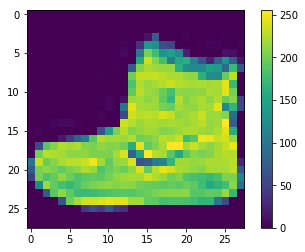

In [0]:
plt.imshow(x_treino[0])
plt.colorbar()

Vemos que esses números que representam as cores variam de 0 a 250. Essa é uma variação grande. Vamos fazer com que esses valores variem entre 0 e 1. Como? Simplesmente divindo o x_treino por 250.0. O ".0" e para transformar o resultado em floar's pois a divisão de int por float é igual a float. 

In [0]:
x_treino = x_treino/250.0

modelo.fit(x_treino, y_treino)

60000/60000 [==============================] - 5s 79us/sample - loss: 0.9730


Podemos perceber uma diminuição da perda. Vamos adicioanar mais camadas entre a 1 e a 2 para ver se temos um redução da perda.

In [0]:
#Vou adicionar mais camadas com a mesma funcao de ativacao da camada 1, mas
#como menos neuronios. Para ir afunilando.
modelo_teste = keras.Sequential( [keras.layers.Flatten(input_shape = (28, 28) ),
                            keras.layers.Dense(256, activation = tensorflow.nn.relu),
                            keras.layers.Dense(128, activation = tensorflow.nn.relu),
                            keras.layers.Dense(64, activation = tensorflow.nn.relu),
                            keras.layers.Dense(10, activation = tensorflow.nn.softmax) ])

#Vamos dar um compile e ver a perda
modelo_teste.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
modelo_teste.fit(x_treino, y_treino)

60000/60000 [==============================] - 6s 94us/sample - loss: 0.4887


Curiosamente tivemos uma redução da perda kk. Não estava esperando por isso :). 

Vamos ver a accuracy do modelo agora. Para isso, vamos passar mais um parâmetro quando usamos a função compile() que o parâmetro metrics, este recebe uma lista com as métricas que serão calculadas e exibidas. Vou passar só a accuracy.

In [0]:
modelo_teste.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
modelo_teste.fit(x_treino, y_treino)

60000/60000 [==============================] - 6s 98us/sample - loss: 0.3697 - acc: 0.8643


Agora vou os introduzir ao conceito de época. Perceba que treinamos uma vez que com todas as 60000 features de treino. Isso é uma epoch (época), um ciclo de treinamento. Mas como na vida, esperamos melhorar conforme treinamos mais. Vamos adicionar mais epócas passando como parâmetro o epochs e igualando a um inteiro, que será o número de épocas, na função fit().

In [0]:
modelo_teste.fit(x_treino, y_treino, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3293 - acc: 0.8787
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3067 - acc: 0.8850
Epoch 3/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2884 - acc: 0.8932
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2753 - acc: 0.8970
Epoch 5/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2642 - acc: 0.9010


Perceba que a cada época a perda caiu e a acurácia ficou melhor. Mas acredito que não seja só colocar infinitas épocas que obteremos um modelo perfeito. Isso só deve funcionar até certo ponto. Mas isso é só o que minha intuição diz.

Vamos agora ver a acurácia  e perda do modelo como os dados de teste. Usando a função evaluate do modelo. Esta função recebe o x_teste e y_teste e retorna uma lista onde o primeiro elemento é a perda e o segundo elemento é a acurácia, 

In [0]:
loss, accuracy = modelo_teste.evaluate(x_teste, y_teste)

#Nem foi preciso printar as variaveis, as informacoes ja estao no output :)

10000/10000 [==============================] - 0s 46us/sample - loss: 55.2595 - acc: 0.8418


Pode-se perceber que a perda está muito grande e acurácia não. Vamos separar um 20% das features para validação. A validação é um teste no modelo enquanto treinamos. 

Para fazer isso, basta passar mais um parâmetro a função fit(), validation_split. Este recebe um número entre 0 e 1 que representa a porcentagem para validação.

In [0]:
#Vou separar 20% do treino para vavlidacao
modelo_teste.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 104us/sample - loss: 0.2470 - acc: 0.9073 - val_loss: 0.2478 - val_acc: 0.9046
Epoch 2/5
48000/48000 [==============================] - 5s 104us/sample - loss: 0.2389 - acc: 0.9092 - val_loss: 0.2610 - val_acc: 0.9035
Epoch 3/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.2292 - acc: 0.9129 - val_loss: 0.2557 - val_acc: 0.9063
Epoch 4/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.2186 - acc: 0.9162 - val_loss: 0.2680 - val_acc: 0.9014
Epoch 5/5
48000/48000 [==============================] - 5s 105us/sample - loss: 0.2139 - acc: 0.9185 - val_loss: 0.2615 - val_acc: 0.9056


Perceba no output a perda e a acurácia nos testes de validação.

Agora, vamos salvar esses dados em uma variável. A função fit retorna um objeto keras.History. Que é um dicionário com as valores de perda, acurácia, perda na validação e acurácia na validação, seperados por época.

docs:
https://keras.io/visualization/

In [0]:
history = modelo_teste.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2)
history.history

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.2067 - acc: 0.9211 - val_loss: 0.2618 - val_acc: 0.9062
Epoch 2/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.1989 - acc: 0.9234 - val_loss: 0.2763 - val_acc: 0.9046
Epoch 3/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.1880 - acc: 0.9277 - val_loss: 0.2926 - val_acc: 0.9027
Epoch 4/5
48000/48000 [==============================] - 5s 105us/sample - loss: 0.1865 - acc: 0.9274 - val_loss: 0.2681 - val_acc: 0.9040
Epoch 5/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.1781 - acc: 0.9319 - val_loss: 0.3044 - val_acc: 0.8959


{'acc': [0.9211042, 0.9234375, 0.9276875, 0.9274375, 0.931875],
 'loss': [0.20668391197919844,
  0.19893777115394673,
  0.18795336846945188,
  0.1864903890180091,
  0.17813351590496798],
 'val_acc': [0.90625, 0.90458333, 0.9026667, 0.904, 0.89591664],
 'val_loss': [0.26180354512731235,
  0.2762881462375323,
  0.2926269492705663,
  0.26813312916954357,
  0.3043813307185968]}

Vamos usar essas informações para plotar dois gráficos. Um que vai comparar a acúracia no treino e acurácia na validação e outro que vai comparar a perda no treino e a perda na validação.

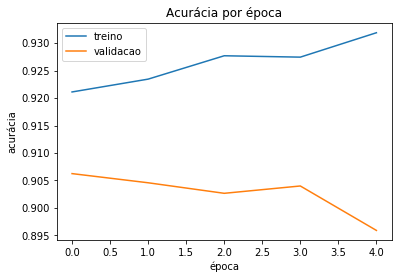

In [0]:
#Plotando a linha de acuracia no treino, selecionando pelo dicionario.
plt.plot(history.history['acc'])
#Plotando a linha de acuracia na validacai, selecionando pelo dicionario.
plt.plot(history.history['val_acc'])
#Dando um titulo ao grafico
plt.title("Acurácia por época")
#Nomeando o eixo x.
plt.xlabel("época")
#Nomeando o eixo y.
plt.ylabel("acurácia")
#Legendando as linhas, dizendo que a primeira linha plotada e a de treino
#e a segunda a de validacao.
plt.legend(['treino', 'validacao'])


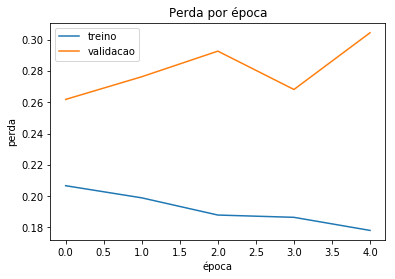

In [0]:
#Plotando a linha de perda no treino, selecionando pelo dicionario.
plt.plot(history.history['loss'])
#Plotando a linha de perda na validacao, selecionando pelo dicionario.
plt.plot(history.history['val_loss'])
#Dando um titulo ao grafico
plt.title("Perda por época")
#Nomeando o eixo x.
plt.xlabel("época")
#Nomeando o eixo y.
plt.ylabel("perda")
#Legendando as linhas, dizendo que a primeira linha plotada e a de treino
#e a segunda a de validacao.
plt.legend(['treino', 'validacao'])

#Dropout       
        
        
        Podemos perceber que a acurácia de treino está muito maior que a acurácia de validação e que a perde no treino está muito menor do que a perda na validação. 

        Isso indica que nosso modelo está tendo um overfitting, ou seja, ele está se ajustando tão bem aos dados de treino que não está conseguindo generalizar. Logo, está apenas memorizando os dados.
        
        Para resolver isso, usaremos mais uma técnica de validação chamada Dropout. Que consiste em adormecer uma parte dos neurônios de cada camada, menos a primeira e a última, a cada época. Geralmente o recomendado é 20%. Então usamos o keras.layers.Dropout depois de cada camada, passado como parâmetro 0.2 que significa 20%.

In [0]:
modelo_drop = keras.Sequential( [keras.layers.Flatten(input_shape = (28, 28) ),
                            keras.layers.Dense(256, activation = tensorflow.nn.relu),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = tensorflow.nn.relu),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation = tensorflow.nn.relu),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(10, activation = tensorflow.nn.softmax) ])

modelo_drop.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = modelo_drop.fit(x_treino, y_treino, validation_split = 0.2, epochs = 5)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 125us/sample - loss: 0.6223 - acc: 0.7758 - val_loss: 0.4409 - val_acc: 0.8356
Epoch 2/5
48000/48000 [==============================] - 6s 120us/sample - loss: 0.4444 - acc: 0.8398 - val_loss: 0.3924 - val_acc: 0.8564
Epoch 3/5
48000/48000 [==============================] - 6s 121us/sample - loss: 0.4057 - acc: 0.8557 - val_loss: 0.3926 - val_acc: 0.8558
Epoch 4/5
48000/48000 [==============================] - 6s 122us/sample - loss: 0.3830 - acc: 0.8620 - val_loss: 0.3648 - val_acc: 0.8677
Epoch 5/5
48000/48000 [==============================] - 6s 122us/sample - loss: 0.3648 - acc: 0.8691 - val_loss: 0.3627 - val_acc: 0.8731


In [0]:
history.history

{'acc': [0.77577084, 0.8398333, 0.85566664, 0.8619792, 0.8691458],
 'loss': [0.6222527915040652,
  0.4444042975554864,
  0.40569447981814544,
  0.3829555799762408,
  0.36475331437091035],
 'val_acc': [0.8355833, 0.85641664, 0.85575, 0.86766666, 0.87308335],
 'val_loss': [0.44094677170117696,
  0.39244581405321755,
  0.3926444014310837,
  0.3648178669412931,
  0.3627436276872953]}

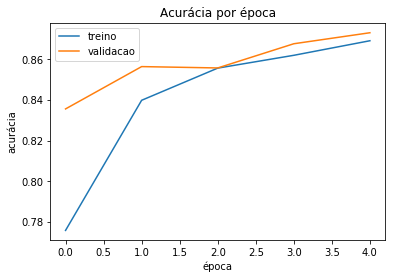

In [0]:
#Plotando a linha de acuracia no treino, selecionando pelo dicionario.
plt.plot(history.history['acc'])
#Plotando a linha de acuracia na validacao, selecionando pelo dicionario.
plt.plot(history.history['val_acc'])
#Dando um titulo ao grafico
plt.title("Acurácia por época")
#Nomeando o eixo x.
plt.xlabel("época")
#Nomeando o eixo y.
plt.ylabel("acurácia")
#Legendando as linhas, dizendo que a primeira linha plotada e a de treino
#e a segunda a de validacao.
plt.legend(['treino', 'validacao'])

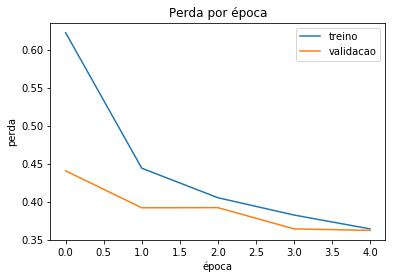

In [0]:
#Plotando a linha de perda no treino, selecionando pelo dicionario.
plt.plot(history.history['loss'])
#Plotando a linha de perda na validacao, selecionando pelo dicionario.
plt.plot(history.history['val_loss'])
#Dando um titulo ao grafico
plt.title("Perda por época")
#Nomeando o eixo x.
plt.xlabel("época")
#Nomeando o eixo y.
plt.ylabel("perda")
#Legendando as linhas, dizendo que a primeira linha plotada e a de treino
#e a segunda a de validacao.
plt.legend(['treino', 'validacao'])

Podemos ver que agora o comportamento das linhas de treino e de validação estão bem parecidos, isso quer dizer que não está acontecendo mais o overfitting.

#Salvando o modelo

Para salvar o modelo, usamos a função do save do keras e para carregarmos um modelo usamos a função load_model. A função save recebe como parâmetro o nome do arquivo e a extensão h5 que é de HDF5.

Para usar o load_model, você tem que importar essa função de tensorflow.keras.models

In [0]:
modelo_drop.save('intro_deeplearning_modelo.h5')

#Sumário, examinado o modelo

        Por enquanto, o que modo como nosso modelo funciona está obscuro para nós. Mas vamos começar a elucidadar isso. O que acontece são dos movimentos: O fowardpropagation e o backpropagation. 

        O que entra na nossa camada 0, Flatten, são valores númericos. Em cada camada, esses valores vão sofrendo transformações pelas funções reLu até chegar ná última camada, passar pela função softmax e serem transforamdos nas probabilidades para ser feita a classificação. Esse processo é chamado de fowardpropagation, onde os valores vão sendo passados para frente.
        
        Após o fowardpropagation, temos o backpropagation onde, de trás pra frente e de acordo com o resultado da classificação, certo ou errada, os pesos de cada neurônio vão sendo modificados.
        
        

#Backpropagation

        Esse conceito explodiu tanto o meu cérebro que separei um célula só pra ele. Vou dividir esta célula em conceito e matemática.
        
        
 

1.  Conceito

         O conceito do backpropagation funcionada da seguinta forma. Vamos supor que tenhamos uma rede neural de 4 camadas, sendo uma a de entrada, duas a de processamento ou camadas ocultas e uma de sáida. Vamos supor támbem que esta rede está fazendo uma classificação de imagens de números manuscritos, o mnist por exemlp. Então teremos 10 neurônios na camada de sáida, um para cada número.
         
         Vamos supor que entramos com a imagem de um 2, foram feitas todas as transformações dos valores de cada pixel da imagem até chegarmos nas probabilidades na última camada e que o neurônio que teve o maior valor de probabilidade foi o neurônio no qual a resposta é 2. Logo, foi feita uma classificação correta.
         
         Agora, vamos focar apenas na última e penúltima camada e apenas nesse caso de entrada. Queremos aumentar o peso do neurônio 2 e diminuir os pesos dos outros neurônios, na última camada. Para assim reforçar essa resposta certa. Lembrando que cada neurônio na penúltima camada está conectado ao neurônio 2 da última camada, para aumentar o peso do neurônio 2, cujo o valor de sáida depende dos neurônios da penúltima camada, temos que mexer nos pesos da penúltima camada. O mesmo vale para diminuir o peso dos outros neurônios.
          
          Então, vamos para a penúltima camada e usar a mesma ideia: Aumentar o peso dos neurônios que deram uma resposta certa, nesse caso de reLU, um número positivo e diminuir o peso dos neurônios que deram uma resposta errada, nesse caso, um 0. A mudança nos pesos dos neurônios, seja aumentando o peso ou diminuindo, é proporcional ao peso do neurônio. E fazemos isso recursivamente, indo para trás na rede.
          
         Mas fizemos isso apenas para uma entrada, a entrada da imagem 2. Se fizemos apenas isso, teríamos uma rede que classificaria tudo como 2. Temos que fazer esse mesmo processo para cada entrada. No fim, cada entrada irá querer fazer uma mudança diferente em cada neurônio. Então tiramos a média de cada modifição desejada por cada entrada em cada neurônio. Essas respectivas médias serão a alteração no peso de cada respectivo neurônio.
          
          Contudo, se fizemos o backpropagation para cada entrada e só no fim tirássemos a média e descobrissimos qual seriam os ajustes nos pesos de cada neurônio. O processo seria computacionalmente lento demais. Então o que é feito é separar as entradas em lotes(batch's) e aplicar o backpropation, tirar as médias e ajustar os pesos para cada lote(batch). Assim, mesmo que não tenhamos o melhor ajuste póssivel, ainda temos um ajusto suficientemente bom dos pesos e em tempo víavel.
          
          Obs: O tamanho do batch pode ser passado por parâmtro na função fit (batch_size), podendo assim, dependendo do tamanho escolhido, até acelerar o treinamento.
         
          Lembrando lá de machine learning, que além de pesos, todo neurônio vai ter um víes. Quando o neurônio erra, o víes é aumentado e quando acerta, é diminiuido.
          
fonte:
https://www.youtube.com/watch?v=Ilg3gGewQ5U

2.   Matemática por trás

          A matemática para calcular os ajustes que cada entrada irá querer envolve derivadas parcias e com isso criamos o gradiente descedente para acharmos um ponto de mínimo de perda, não entendi muito bem para conseguir explicar aqui, mas tem esse vídeo explicando, assista com calma. Preciso anotar de assistir com calma, entender e explicar aqui.
          
          Obs: A "velocidade" com que "caminhamos" para um ponto de mínimo de perda é parametrizável (lr, learning rate) no optimizer. Nem sempre quanto mais velocidade é melhor, pois pode acabar nunca chegando a um ponto de mínimo local na função de perda e caindo em um ponto onde a perda de informação é alta.
          
https://www.youtube.com/watch?v=tIeHLnjs5U8



Bom, finalmente vamos ver o sumário do modelo, usando a função sumary() do próprio modelo. Nele veremos muitas informações relevantes.

In [0]:
modelo_drop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

        Podemos ver que a na primeira colunas temos os tipos das camadas dos nossos modelos. No segunda coluna, temos uns números que representam quanos neurônios temos na camada. Talvez esteja se perguntando o porquê da camada flatten_2, vulgo 0 , ter 784 neurônios. Lembre do que escrevemos para criar essa camada: "keras.layers.Flatten(input_shape = (28, 28)", veja que o input_shape é igual a 28 por 28, 28 vezes 28 é igual a 784. 
        
        Agora veja a última coluna, a coluna de parâmetros, param. Podemos dizer que tem 0 para a camada flatten_2 pois nela as entradas só são tranformadas de matrizes para linhas. Mas agora olhe para a camada dense_6, ela tem 200960 parâmetros. Temos uma entrada de 784 valores e cada um dos 256 neurônios receberam 784 valores, 784 vezes 256 é igual a 200704. Mas ainda falta para 200960. Note que 200960 menos 200704 é igual a 256, que exatamente o número de neurônios da camada. Então, esses outros 256 valores são os pesos, citados no texto sobre backpropagation, que cada neurônio tem. 
        
        Lembrando de novo, que além de pesos, todo neurônio vai ter um víes.
        
        

        Beleza, mas como esses pesos são decididos inicialmente. Começam todos com 0? Valores aleatórios? Vamos fazer alguns experimentos. 
        
        Para facilitar, vou usar o nosso primeirp medelo que contém apenas 3 camadas.


#Como os pesos e vieses são iniciados

Vamos usar a função zero do numpy para criar um array de zeros e setar como os pesos da nossa camada 1.  Para criarmos esse array, temos que saber qual é o formato de array de pesos. Por isso, vamos usar a função get_weights do keras que vai nos devolver uma lista com dois arrays, o primeiro sendo os de pesos e o segundo o de vieses.

In [0]:
#Vamos dar um olhada nesses pesos e nesses vieses

#Pegando os pesos da camada 1 do modelo.
pesos_camada_dense = modelo.layers[1].get_weights()[0]

#Pegando os vieses
vieses_camada_dense = modelo.layers[1].get_weights()[1]

print("Pesos")
print(pesos_camada_dense)
print("Vieses")
print(vieses_camada_dense)


Pesos
[[-0.04266476  0.05269681  0.03370099 ... -0.02804128 -0.01043916
   0.0192976 ]
 [-0.02390505  0.07616955  0.03293506 ... -0.04198422 -0.03646073
  -0.06522209]
 [-0.01974543 -0.0060572  -0.00332699 ... -0.07092287  0.01705177
  -0.0842156 ]
 ...
 [ 0.04608349 -0.03544332  0.0406919  ...  0.05011312 -0.04772728
  -0.03766431]
 [ 0.04380728 -0.05052399 -0.00746211 ...  0.07067342  0.06443384
   0.04517613]
 [ 0.09579735  0.03862194 -0.04784159 ... -0.05982447  0.01654675
  -0.01813661]]
Vieses
[ 1.00875914e+00  4.26920503e-02 -3.04434132e-02  1.27487981e+00
 -5.84575301e-03 -3.45646366e-02  9.62476313e-01  4.37981665e-01
  6.71550632e-01  1.72472727e-02  8.69565189e-01 -2.59968080e-02
 -1.76471733e-02  7.48584330e-01  5.51734447e-01  2.39663750e-01
 -1.46181518e-02  6.03963375e-01  7.93086410e-01  3.02648574e-01
  1.15981795e-01  6.44624889e-01 -2.50446908e-02  5.87572157e-01
  1.07396245e+00  3.41501459e-03 -1.85897667e-02  6.63685858e-01
 -2.41148099e-02 -3.16229835e-02  3.1923

Não vamos mexer nos vieses, então vamos ver apenas o shape do array de pesos.

In [0]:
pesos_camada_dense.shape

(784, 256)

Vamos usar a função zeros() do numpy para criar um array de zeros no mesmo formato. Depois vemos usar a função set_weights para setar os novos pesos e setar os mesmos vieses.

In [0]:
import numpy as np

#Criando o array de zeros
pesos_camada_dense_zerados = np.zeros( (784,256))

#Setando os pesos e os vieses

modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)

Vamos recompilar o modelo, fazer o fit e ver os gráficos.

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 94us/sample - loss: 0.5197 - acc: 0.8150 - val_loss: 0.4272 - val_acc: 0.8437
Epoch 2/5
48000/48000 [==============================] - 4s 91us/sample - loss: 0.3896 - acc: 0.8567 - val_loss: 0.3765 - val_acc: 0.8646
Epoch 3/5
48000/48000 [==============================] - 4s 90us/sample - loss: 0.3474 - acc: 0.8713 - val_loss: 0.3499 - val_acc: 0.8748
Epoch 4/5
48000/48000 [==============================] - 4s 91us/sample - loss: 0.3179 - acc: 0.8827 - val_loss: 0.3251 - val_acc: 0.8828
Epoch 5/5
48000/48000 [==============================] - 4s 90us/sample - loss: 0.2984 - acc: 0.8889 - val_loss: 0.3310 - val_acc: 0.8817


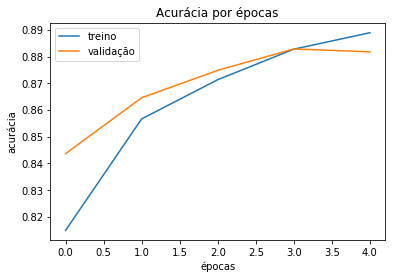

In [0]:
#Compilando o modelo e fazendo o fit
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(x_treino, y_treino, epochs=5, validation_split=0.2)

#Plotando o grafico de acuracia por epoca

plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Opa, vemos que aconteceu algo parecido com o overfitting, onde acurácia de treino está melhor que a de validação.

Vamos tentar usando valores aleatórios. Usando a funçaõ rand do módulo random do numpy.

In [0]:
#Criando o array de zeros
pesos_camada_dense_aleatorios = np.random.rand( 784,256)

#Setando os pesos e os vieses

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

#Compilando o modelo e fazendo o fit
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(x_treino, y_treino, epochs=5, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 94us/sample - loss: 10.8588 - acc: 0.6647 - val_loss: 2.2133 - val_acc: 0.7880
Epoch 2/5
48000/48000 [==============================] - 4s 92us/sample - loss: 3.2560 - acc: 0.7408 - val_loss: 2.8284 - val_acc: 0.7721
Epoch 3/5
48000/48000 [==============================] - 5s 94us/sample - loss: 3.5204 - acc: 0.7586 - val_loss: 6.4949 - val_acc: 0.7010
Epoch 4/5
48000/48000 [==============================] - 5s 95us/sample - loss: 3.3564 - acc: 0.7663 - val_loss: 5.4241 - val_acc: 0.7073
Epoch 5/5
48000/48000 [==============================] - 4s 92us/sample - loss: 3.4215 - acc: 0.7751 - val_loss: 2.0963 - val_acc: 0.8217


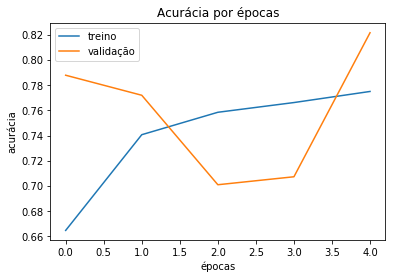

In [0]:
#Plotando o grafico de acuracia por epoca

plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Podemos ver uma flutuação muito grande na acúracia de validação.

Vamos dar uma olhada na configuração do modelo usando a função get_config()

In [0]:
modelo.get_config()

{'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'dtype': 'float32', 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel

        Recebemos um Json. Repare na parte onde class_name: Dense tem a seguinte linha:

        kernel_initializer': {'class_name': 'GlorotUniform

        A classe GlorotUniform é a classe que faz o cálculo dos pesos iniciais. 

        Vou deixar aqui o docs desta classe e um link para um artigo que fala sobre ela:

https://keras.io/initializers/

http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

        Talvez esteja se perguntando sobre como os vieses são inicializados.
        De uma forma simples até, observe a seguinte linha:
        
        bias_initializer': {'class_name': 'Zeros'
        
        Veja que a classe que inicializa os vieses é a Zeros. Logo, todos os vieses são inicializados com valor 0.

#Callbacks

        Nosso modelo, na busca de um mínimo global, usando o gradiente descedente com seu otimizador, pode acabar estacionando em um mínimo local, seja na função de perda, de acurácia ou outra, parando de evoluir. Seria muito incômodo ter que ficar acompanhado varías épocas sem evolução desse determinado valor. Para essa e outras situações, o Keras tem um módulo chamado Callbacks com várias funções muito úteis na análise do treinamento.
        
https://keras.io/callbacks/